In [47]:
# Initialize Otter
import otter
grader = otter.Notebook("ps8.ipynb")

### EDA on crime in Detroit
This data corresponds to the open dataset provided by data.detroitmi.gov
https://data.detroitmi.gov/datasets/detroitmi::rms-crime-incidents/about

In this assignment, you will perform Exploratory Data Analytics on the given dataset. To score full points, you have to provide a conclusion with your insights after exploring the dataset with specific recommendation on what folks could do to avoid being a crime victim in Detroit. Assignments will no conclusion will lose a point.


In [48]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.graph_objects as go

### Question 1
Load the dataset from crime_data.csv file given with this file into a dataframe variable named `df`


In [49]:
df = pd.read_csv("./crime_data.csv", header=0,
                  dtype={"report_number": str, "arrest_charge": str,
                         "scout_car_area": str, "precinct": str})

In [50]:
df.head()

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,...,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,ibr_date,oid
0,-83.245712,42.357388,3001799,1612120111,Burt Rd & Joy Rd,ARSON,ARSON,2099,20000,ARSON,...,0606,06,261635466001005,Franklin Park,7,48228,-83.245712,42.357388,2017/01/27 15:08:19+00,1
1,-83.131659,42.307950,3006180,1612260018,Lawndale St & Senator St,ARSON,ARSON,2099,20000,ARSON,...,0408,04,261635242005002,Springwells,6,48209,-83.131659,42.307950,2017/05/29 15:26:32+00,2
2,-82.999770,42.434586,3016970,1701240005,E 7 Mile Rd & Dresden St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,0901,09,261635033003012,Pulaski,3,48205,-82.999770,42.434586,2017/03/03 15:03:30+00,3
3,-83.112285,42.349950,3021416,1702040249,Scotten St & Milford St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,1009,10,261635272001021,Midwest,5,48210,-83.112285,42.349950,2017/05/29 15:26:32+00,4
4,-82.967531,42.420755,3032322,1702272402,Queen St & Houston Whittier Ave,ARSON,ARSON,2099,20000,ARSON,...,0909,09,261635041001001,Outer Drive-Hayes,4,48205,-82.967531,42.420755,2017/03/03 15:03:30+00,5


In [51]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2
Get all the column names of the dataframe that has 'offense' mentioned anywhere in the name.
Do not hard code the values. You have to derive the values using a suitable coding expression

In [52]:
cols = df.filter(axis=1, like="offense").columns

In [53]:
grader.check("q2")

q2 results: All test cases passed!

### Question 3
Put the name of the only column that has some null values in cols_with_null variable. Here again you have to derive the column name with suitable expression

**Note:** This has only one hidden test.

In [54]:
cols_with_null = df.isnull().any().idxmax()

### Question 4
Look into the offense_description column. 
Clean up the offense descriptions by removing the `-` and getting rid of any text after the `-` (along with empty spaces around the word) and then count the number of unique offense descriptions in this dataset.
Assign the number of unique offense description types after cleaning to the variable `count_of_unique_offense_desc`

In [55]:
df["offense_description"] = df["offense_description"].str.split("-", expand=True).iloc[:, 0].str.strip()
count_of_unique_offense_desc = df["offense_description"].nunique()

In [56]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5

Plot the distribution of the 10 most common offense category  and 10 least common offense categories
with appropriate titles for 'x' and 'y' axis in the same figure. To ensure all your tests pass properly, create a figure object  with two axes sub plots `ax`. Assign the `ax[0]` to 10 largest and `ax[1]` to 10 smallest counts



In [57]:
least_common.index

Index(['GAMBLING', 'SOLICITATION', 'SEXUAL ASSAULT', 'JUSTIFIABLE HOMICIDE',
       'EXTORTION', 'LIQUOR', 'KIDNAPPING', 'FORGERY', 'OTHER',
       'DISORDERLY CONDUCT'],
      dtype='object')

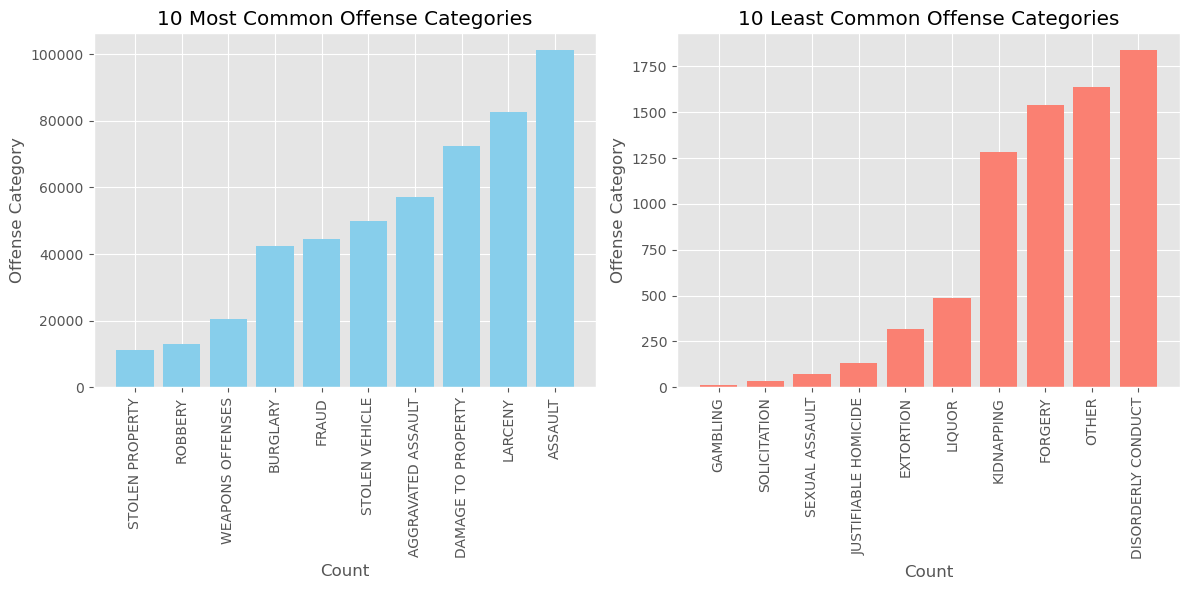

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

offense_counts = df["offense_category"].value_counts()

sorted_offense_counts = offense_counts.sort_values()

# 10 most and 10 least
most_common = sorted_offense_counts.tail(10)
least_common = sorted_offense_counts.head(10)

# Plot 
ax[0].bar(most_common.index, most_common.values, color="skyblue")
ax[0].set_title("10 Most Common Offense Categories")
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Offense Category")
ax[0].tick_params(axis="x", labelrotation=90) 

ax[1].bar(least_common.index, least_common.values, color="salmon")
ax[1].set_title("10 Least Common Offense Categories")
ax[1].set_xlabel("Count")
ax[1].set_ylabel("Offense Category")
ax[1].tick_params(axis="x", labelrotation=90) 

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [59]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6
Write a query to count all the offenses that has the keyword `larceny` in the offense description and assign that value to a variable called `total_larcenies_in_description`. Also get the total number of records that have `larceny` in the offense_category and check if the two counts match. Answer if the counts match or not.

In [60]:
#offense_description
total_larcenies_in_description = df.offense_description
total_larcenies_in_description = total_larcenies_in_description[total_larcenies_in_description.str.contains("larceny".upper())].shape[0]

total_larcenies_in_category = df.offense_category
total_larcenies_in_category = total_larcenies_in_category[total_larcenies_in_category.str.contains("larceny".upper())].shape[0]

print(total_larcenies_in_description, total_larcenies_in_category, total_larcenies_in_description==total_larcenies_in_category)
print("The counts do not match")

82926 82720 False
The counts do not match


### Question 7
Which day of the week has the maximum number of offenses? Write a query to find that and assign the result to `week_day_with_max_offenses`


In [61]:
# as piazza says, only two rows are exactly the same, then we can drop one of them, so we first drop duplicates
df.drop_duplicates(inplace=True)
# count number of offenses
week_day_with_max_offenses = df[["day_of_week", "crime_id"]].groupby("day_of_week").count().sort_values(by="crime_id", ascending=False).head(1).index[0]

In [62]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 8
Segment the 24 hours into 
* night from 12 midnight to 5 am
* morning from 5:01 am to 12 noon
* afternoon from 12.01 noon to 5 pm
* evening from 5.01 pm to 12 am

And then show the total crimes for each day of the week and the day segment counts in a suitable chart. 
Hint: You could use one of the seaborn Facet charts for example

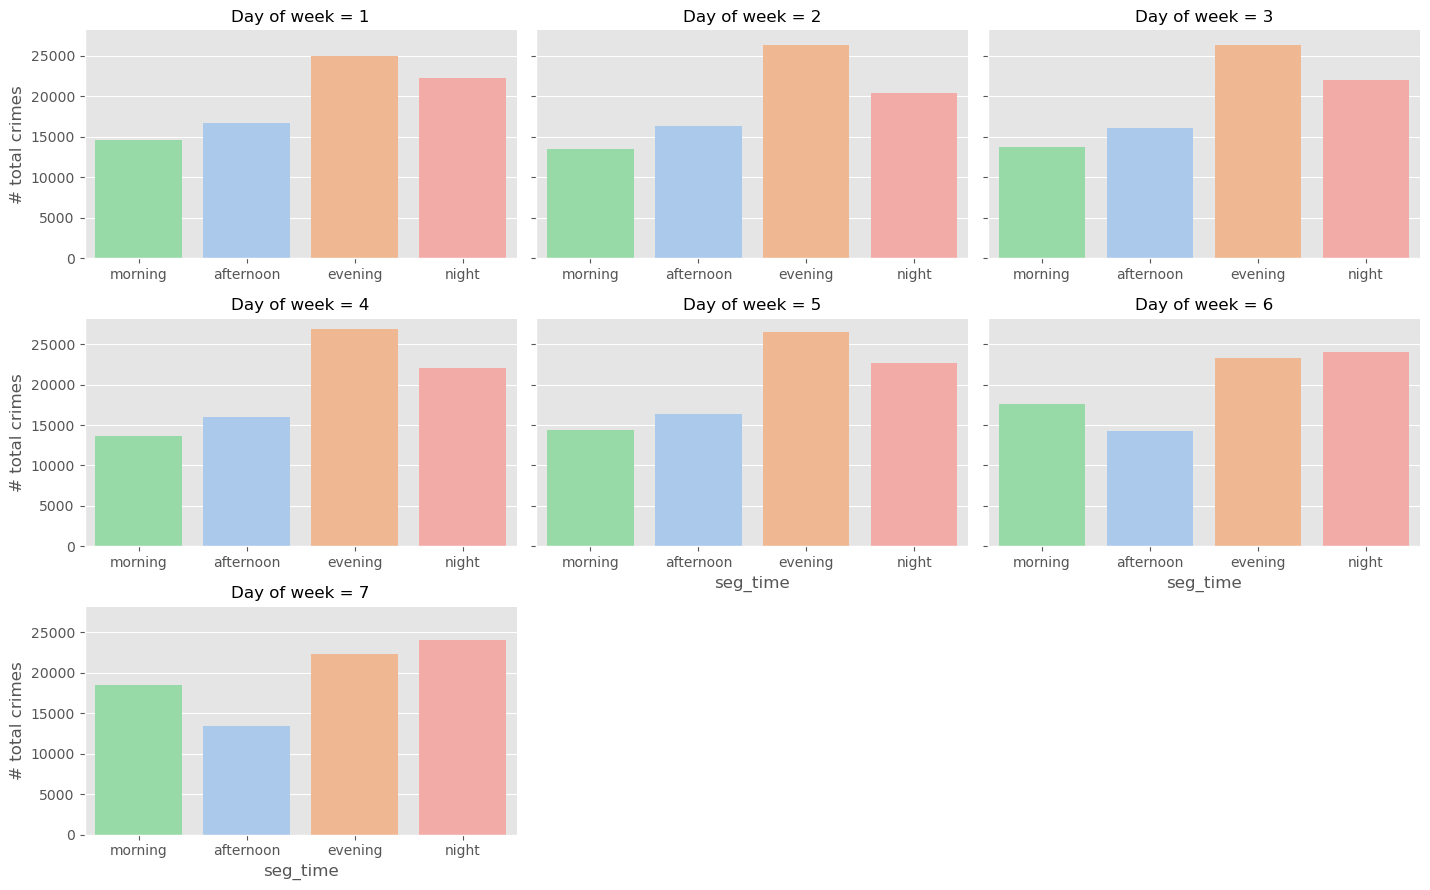

In [63]:
#segmentation function
def seg(t):
    from datetime import time
    time_ocr = time(*map(int, str(t).split(":")))
    if time(0,0,0) <= time_ocr <= time(5,0,0):
        return "night"
    elif time(5,1,0) <= time_ocr <= time(12,0,0):
        return "morning"
    elif time(12,1,0) <= time_ocr <= time(17,0,0):
        return "afternoon"
    else:
        return "evening"
    
# use crime_id to count, as piazza says, only two rows are exactly the same, then we can drop one of them, so we first drop duplicates
df.drop_duplicates(inplace=True)
df["seg_time"] = df["incident_time"].map(seg)
df_seg_gp = df[["seg_time", "day_of_week", "crime_id"]].groupby(by=["day_of_week", "seg_time"]).count()
df_seg_gp

df_seg_gp.reset_index(inplace=True)
# Create a FacetGrid with Seaborn
g = sns.FacetGrid(df_seg_gp, col="day_of_week", col_wrap=3, aspect=1.6, hue="seg_time", palette="pastel", sharex=False)

# Use map to create a bar plot for each Level1 value
g.map_dataframe(sns.barplot, "seg_time", "crime_id",
                x="seg_time", y="crime_id",
                order=df_seg_gp["seg_time"].unique()[[2,0,1,3]])

# Set titles for each subplot
g.set_ylabels("# total crimes")
g.set_titles("Day of week = {col_name}")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 9
Answer any other questions that might have to come to your mind after working on this dataset for this long. 
You have to show at least 3 different charts


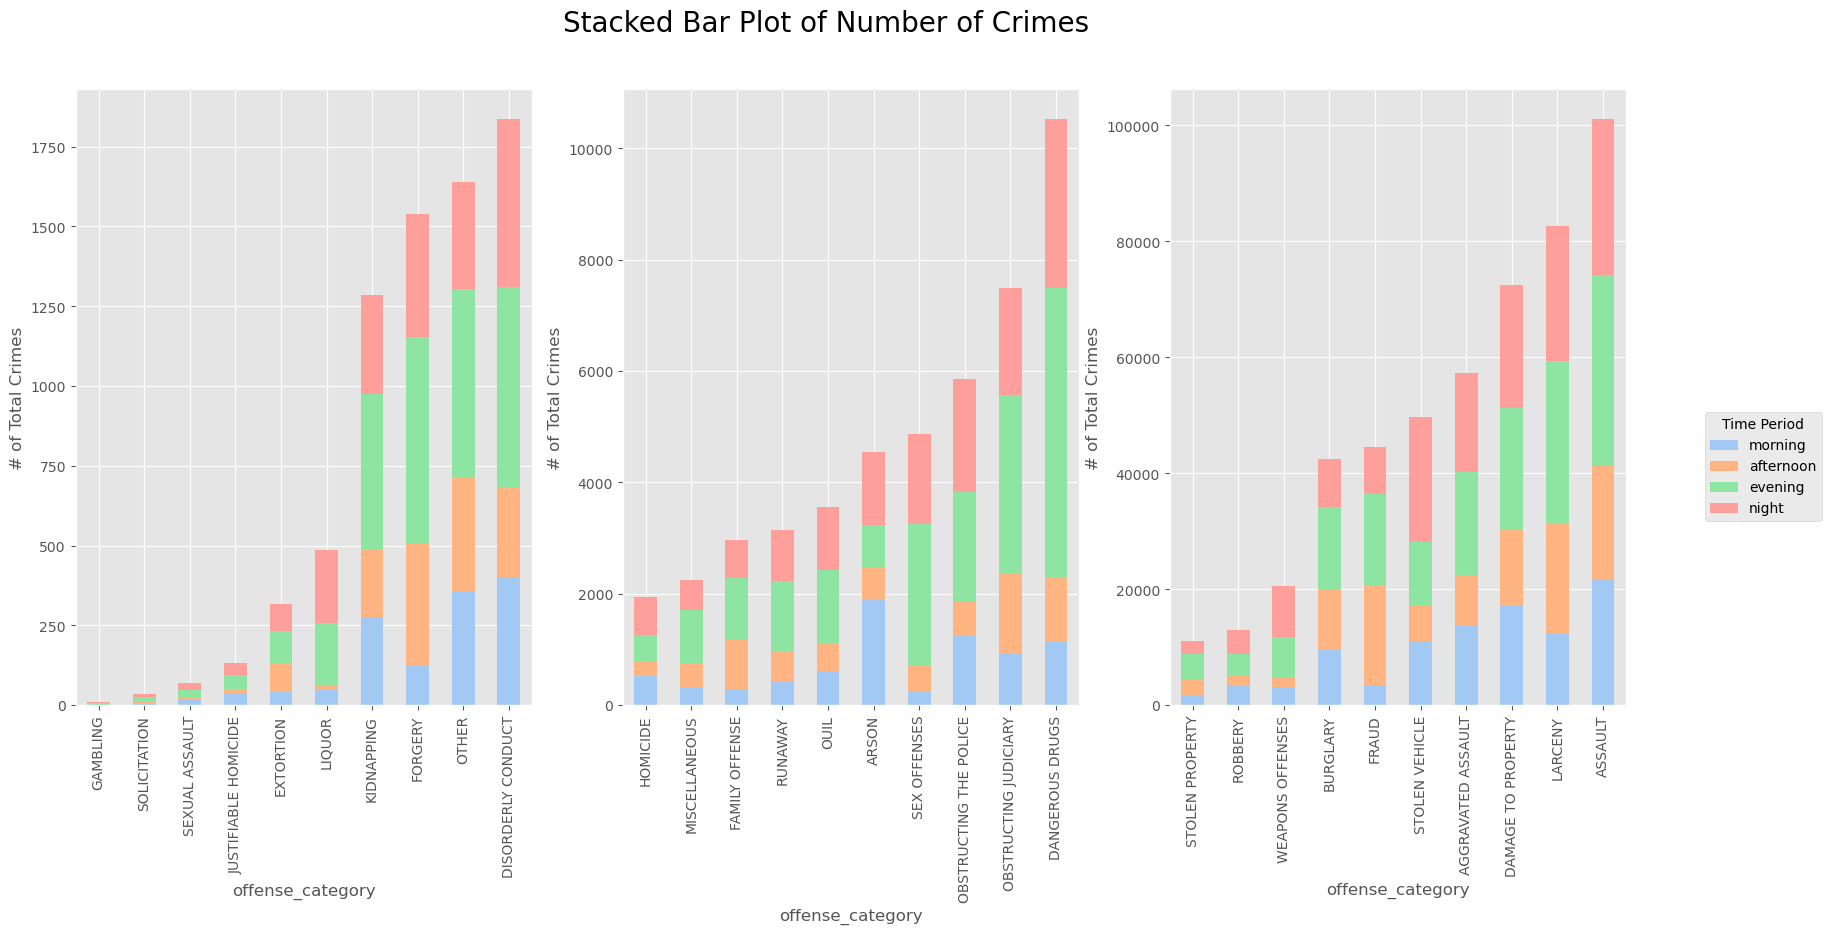

In [64]:
# Question 1: How are various types of offenses distributed throughout the day (using the segmentation above)?
# we draw a bar plot
sns.set_palette("pastel")
df_offen = df[["offense_category", "seg_time", "crime_id"]].groupby(["offense_category", "seg_time"]).count()
df_offen.reset_index(inplace=True)
df_offen.sort_values(by="crime_id", ascending=False, ignore_index=True, inplace=True)

# Pivot the DataFrame to create a format suitable for a stacked bar plot
pivot_df = df_offen.pivot(index="offense_category", columns="seg_time", values="crime_id").fillna(0)

# Sort the bars by the total bar height
pivot_df["Total"] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by="Total", ascending=True).drop(columns='Total')
pivot_df1 = pivot_df.iloc[:10,[2,0,1,3]]
pivot_df2 = pivot_df.iloc[10:20,[2,0,1,3]]
pivot_df3 = pivot_df.iloc[20:,[2,0,1,3]]

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
# Plot the dataframes and set an empty string as the color map
for i, dff in enumerate([pivot_df1, pivot_df2, pivot_df3]):
    ax[i].set_xlabel("Offense Category")
    ax[i].set_ylabel("# of Total Crimes")
    dff.plot(kind="bar", stacked=True, ax=ax[i], legend=False)

# Create a single legend for the entire figure
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="right", title="Time Period")


fig.suptitle("Stacked Bar Plot of Number of Crimes", fontsize=20)

plt.show()

# My conclusion for Question 1:
Generally, all types of crimes, from the least common to the most common, are more likely to occur in the evening or at night.

In [65]:
df_neig_least.index

Index(['Medbury Park', 'Oakwood Heights', 'Joseph Berry Sub', 'Melvern Hill',
       'Virginia Park', 'West Virginia Park', 'Arden Park', 'Waterworks Park',
       'Douglass', 'Belle Isle'],
      dtype='object', name='neighborhood')

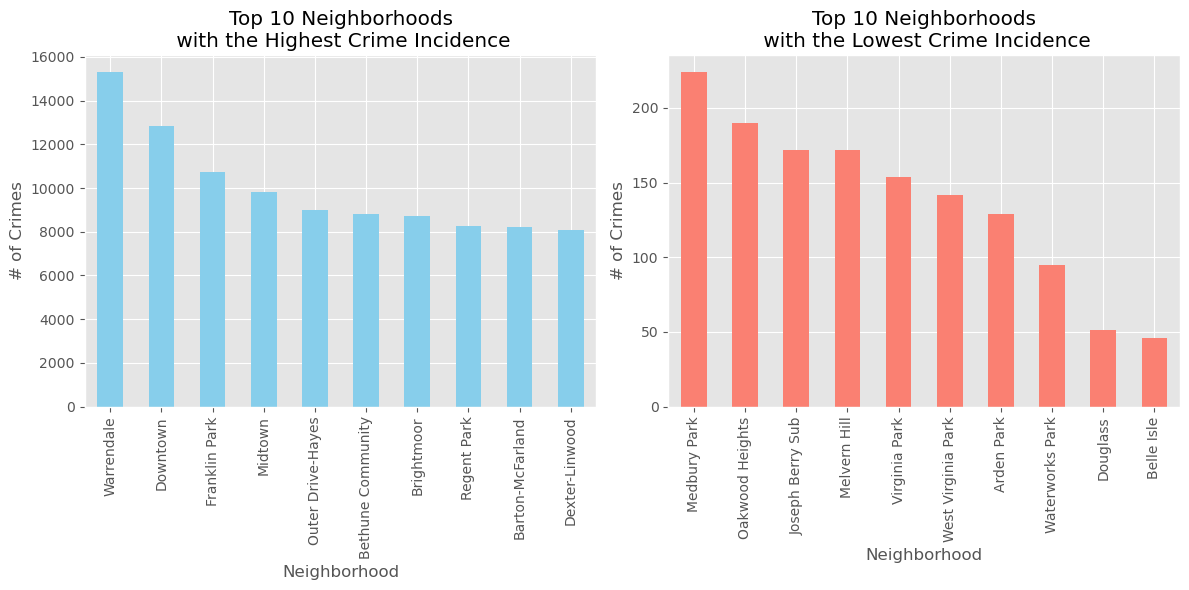

In [66]:
# Question 2: The 10 most and 10 least offense-happened neighborhood, and the distribution.
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df_neig = df[["neighborhood", "crime_id"]].groupby(["neighborhood"]).count()
df_neig.sort_values(by="crime_id", ascending=False,inplace=True)

# 10 most and 10 least
df_neig_most = df_neig.head(10)
df_neig_least = df_neig.tail(10)
# Plot 
df_neig_most.plot(kind="bar", color="skyblue", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Neighborhoods\n with the Highest Crime Incidence")
ax[0].set_xlabel("Neighborhood")
ax[0].set_ylabel("# of Crimes")
ax[0].tick_params(axis="x", labelrotation=90) 

df_neig_least.plot(kind="bar", color="salmon", ax=ax[1], legend=False)
ax[1].set_title("Top 10 Neighborhoods\n with the Lowest Crime Incidence")
ax[1].set_xlabel("Neighborhood")
ax[1].set_ylabel("# of Crimes")
ax[1].tick_params(axis="x", labelrotation=90) 

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# My conclusion for Question 2:
In terms of the number of crimes, Warrendale and downtown are the most dangerous, while Douglas and Belle Isle are the safest.

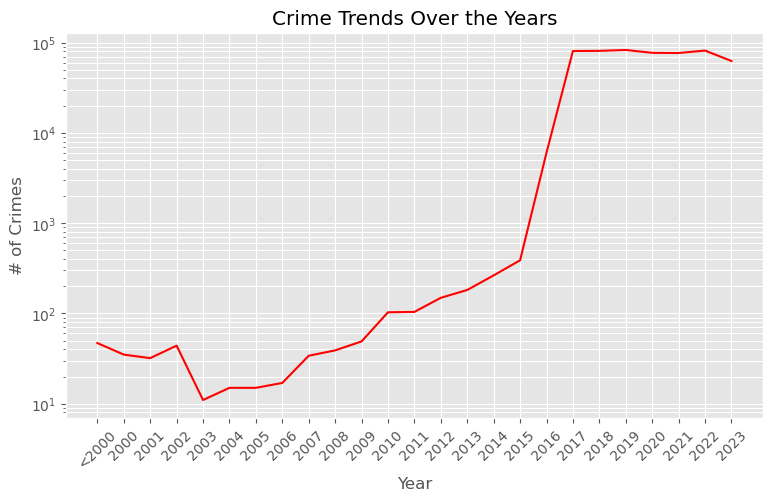

In [67]:
# Question 3: What is the trend in the number of crimes over the years?

# total trend
df_year = df[["year", "crime_id"]].groupby("year").count()
b4_2000 = df_year[df_year.index<2000].sum().values
df_year = df_year[df_year.index>=2000]

plt.figure(figsize=(9, 5))  # Optional: Set the figure size
plt.plot(pd.Index(["<2000"]).append(df_year.index.astype(str)),
         np.concatenate((b4_2000, df_year['crime_id'])),linestyle='-', color="red")
plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.yscale("log")
plt.ylabel("# of Crimes")
plt.grid(True, which="both")
plt.show()


# My conclusion for Question 3:
In general, # of crimes exhibits increasing trends over the years.
Before the year 2000, the recorded incidence of crimes was relatively rare, although this may not entirely reflect the actual historical occurrence due to a lack of comprehensive records in the 20th century.

Between 2000 and 2010, there was a gradual increase in the number of reported crimes, with an average annual rise of approximately 10 cases.

However, post-2010, there was a significant surge in crimes, especially evident during the years 2015-2017. Subsequent to 2017, the crime numbers entered a relatively stable phase, but at a significantly high level, with approximately 80000 cases reported each year.

(In my opinion, the data from recent years is more reliable. The dramatic increase in reported crimes from 2015 to 2017, going from approximately 300 to 80,000 in just two years, is highly unusual and raises questions about the accuracy of earlier records.)

In [68]:
# Question 4, the location of the neighborhoods mentioned above

# We can take the average of latitude and longitude because their magnitudes are within a small range
df_geo_neigh = df[["latitude", "longitude", "crime_id", "neighborhood"]].groupby(["neighborhood"]).agg({"latitude": "mean", "longitude": "mean", "crime_id": "count"})
df_geo_neigh.reset_index(inplace=True)

# Create a Mapbox figure
fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    lat=df_geo_neigh["latitude"],
    lon=df_geo_neigh["longitude"],
    text="Number of crimes: " + df_geo_neigh["crime_id"].astype(str),  
    mode="markers",
    marker=dict(
        size=df_geo_neigh["crime_id"]*0.01,  # Adjust point size based on the number of crimes
        colorscale="Rainbow",  # Choose a colorscale for point color
        reversescale = True,
        opacity = 0.7,
        color=df_geo_neigh["crime_id"],  # Vary color intensity based on the number of crimes
        colorbar=dict(title="Number of Crimes")  # Colorbar title
    )
))

# Customize the Mapbox layout
fig.update_layout(
    mapbox=dict(
        style="mapbox://styles/mapbox/streets-v12",
        accesstoken="pk.eyJ1IjoibmVoY214IiwiYSI6ImNsb2J4dDJjYTBrMHAya3BpNzNraHc5cnAifQ.7xTn6wD4ZjgvH4Zo0mG2CA",
        center=dict(lon=-83.100238, lat=42.363429),  # Centered on Detroit
        zoom=10,  # Adjust the initial zoom level
    ),
    height=800
)
# Add a title to the map
fig.update_layout(title_text="Number of Crimes in Detroit",
                  title_x=0.5,  
                  title_y=0.95)
fig.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 10
Since we have lat/lon information in this dataset, show a suitable geo spatial display of crime locations.

Hint: you could use Plotly Choropleth: https://plotly.com/python/scatter-plots-on-maps/#north-american-precipitation-map


In [69]:
# your answer here

df_geo = df[["latitude", "longitude", "crime_id"]].groupby(["latitude", "longitude"]).count()

df_geo.reset_index(inplace=True)

# Create a Mapbox figure
fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    lat=df_geo["latitude"],
    lon=df_geo["longitude"],
    text="Number of crimes: " + df_geo["crime_id"].astype(str),  
    mode="markers",
    marker=dict(
        size=df_geo["crime_id"].map(lambda x: 0.3*x if x<10 else 0.1*x+2),  # Adjust point size based on the number of crimes
        colorscale="Rainbow",  # Choose a colorscale for point color
        reversescale = True,
        opacity = 0.7,
        color=df_geo["crime_id"],  # Vary color intensity based on the number of crimes
        colorbar=dict(title="Number of Crimes")  # Colorbar title
    )
))

# Customize the Mapbox layout
fig.update_layout(
    mapbox=dict(
        style="mapbox://styles/mapbox/streets-v12",
        accesstoken="pk.eyJ1IjoibmVoY214IiwiYSI6ImNsb2J4dDJjYTBrMHAya3BpNzNraHc5cnAifQ.7xTn6wD4ZjgvH4Zo0mG2CA",
        center=dict(lon=-83.100238, lat=42.363429),  # Centered on Detroit
        zoom=10,  # Adjust the initial zoom level
    ),
    height=800
)
# Add a title to the map
fig.update_layout(title_text="Number of Crimes in Detroit",
                  title_x=0.5,  
                  title_y=0.95 )
fig.show()


<!-- END QUESTION -->



# Conclusion about the question: specific recommendation on what folks could do to avoid being a crime victim in Detroit.

1. Time of Day Matters: Given that crimes are more likely to occur in the evening or at night, exercise extra caution during these hours. If possible, limit outdoor activities during late evening and nighttime, or ensure you are in well-lit and populated areas if you need to be out.

2. Neighborhood-Specific Precautions: Pay special attention to the neighborhoods identified as the most dangerous, such as Warrendale and Downtown, and take extra precautions when you are in these areas. Avoid walking alone and be vigilant about your surroundings.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload this .zip file to Gradescope for grading.

In [70]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)